In [3]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data from 2010 to present
tesla_stock = yf.download('TSLA', start='2010-01-01', progress=False)
tesla_stock.reset_index(inplace=True)
tesla_stock.head()


YF.download() has changed argument auto_adjust default to True


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [16]:
import requests
from bs4 import BeautifulSoup

url_tesla_revenue = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url_tesla_revenue)
soup = BeautifulSoup(response.text, 'html.parser')

tesla_revenue = None
for table in soup.find_all('table'):
    if 'Tesla Quarterly Revenue' in str(table):
        tesla_revenue = table
        break

tesla_revenue_data = []
if tesla_revenue:
    for row in tesla_revenue.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$','').replace(',','')
            if revenue.isdigit():
                tesla_revenue_data.append({'Date': date, 'Revenue': int(revenue)})

tesla_revenue_df = pd.DataFrame(tesla_revenue_data)
tesla_revenue_df.head()


""


In [5]:
# Download GameStop stock data from 2010 to present
gme_stock = yf.download('GME', start='2010-01-01', progress=False)
gme_stock.reset_index(inplace=True)
gme_stock.head()


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2010-01-04,3.854644,3.863060,3.703151,3.714934,26702800
1,2010-01-05,3.959006,3.996037,3.854644,3.856328,21269600
2,2010-01-06,4.044852,4.056635,3.908509,3.948907,21471200
3,2010-01-07,3.443930,3.563441,3.268872,3.368184,164761200
4,2010-01-08,3.415315,3.573540,3.405215,3.474229,47872400


In [17]:
url_gme_revenue = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url_gme_revenue)
soup = BeautifulSoup(response.text, 'html.parser')

gme_revenue = None
for table in soup.find_all('table'):
    if 'GameStop Quarterly Revenue' in str(table):
        gme_revenue = table
        break

gme_revenue_data = []
if gme_revenue:
    for row in gme_revenue.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$','').replace(',','')
            if revenue.isdigit():
                gme_revenue_data.append({'Date': date, 'Revenue': int(revenue)})

gme_revenue_df = pd.DataFrame(gme_revenue_data)
gme_revenue_df.head()


""


KeyError: 'Revenue'

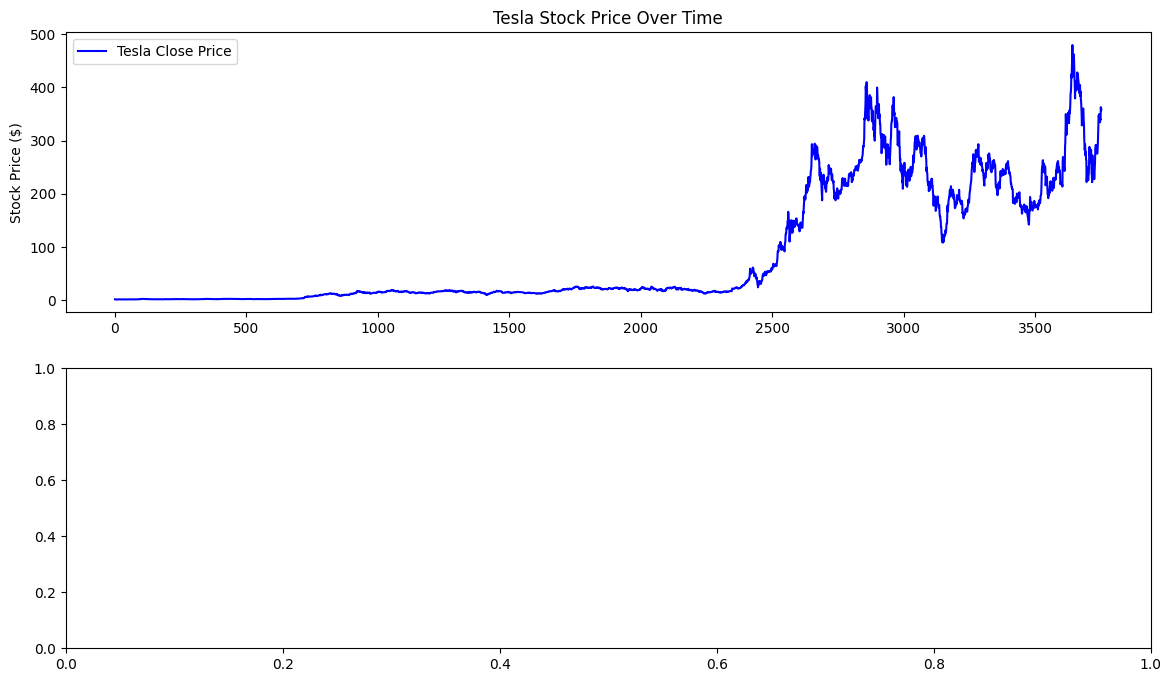

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot Tesla Stock Closing Price
plt.subplot(2,1,1)
plt.plot(tesla_stock['Close'], label='Tesla Close Price', color='blue')
plt.title('Tesla Stock Price Over Time')
plt.ylabel('Stock Price ($)')
plt.legend()

# Plot Tesla Quarterly Revenue
plt.subplot(2,1,2)
plt.bar(tesla_revenue_df['Revenue']/1e6, color='orange')
plt.title('Tesla Quarterly Revenue (in Million $)')
plt.ylabel('Revenue ($ Million)')

plt.tight_layout()
plt.show()


KeyError: 'Revenue'

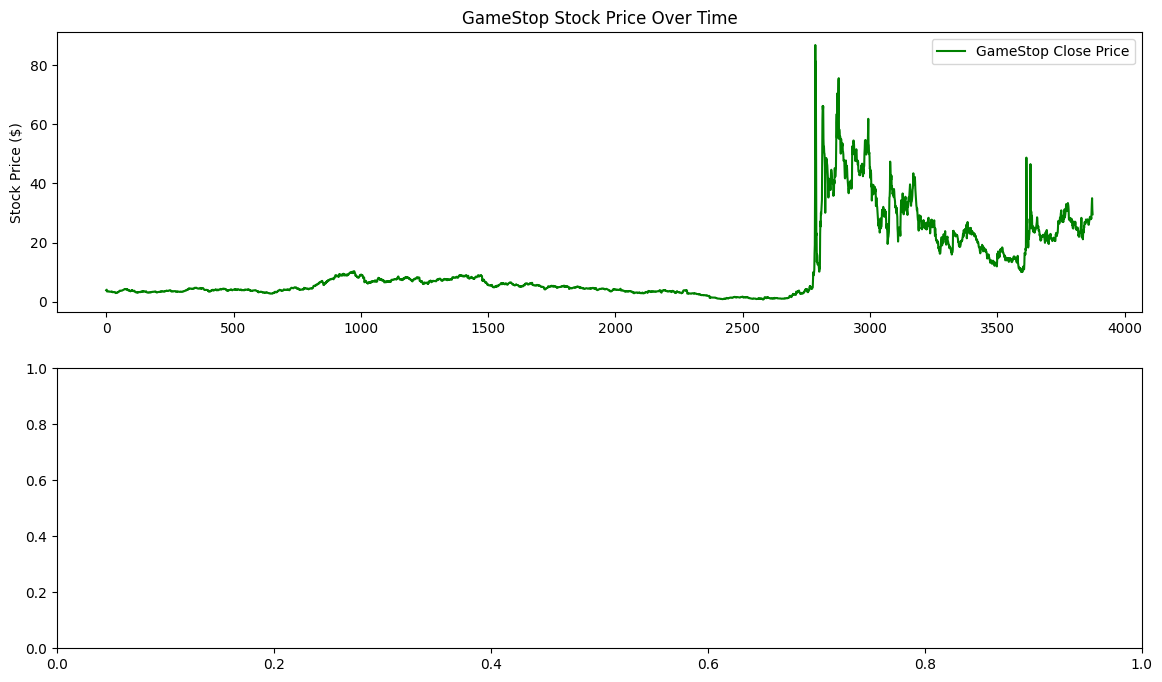

In [21]:
plt.figure(figsize=(14, 8))

# Plot GameStop Stock Closing Price
plt.subplot(2,1,1)
plt.plot(gme_stock['Close'], label='GameStop Close Price', color='green')
plt.title('GameStop Stock Price Over Time')
plt.ylabel('Stock Price ($)')
plt.legend()

# Plot GameStop Quarterly Revenue
plt.subplot(2,1,2)
plt.bar(gme_revenue_df['Revenue']/1e6, color='purple')
plt.title('GameStop Quarterly Revenue (in Million $)')
plt.ylabel('Revenue ($ Million)')

plt.tight_layout()
plt.show()
